## Heart Disease

The dataset comprises 14 columns, each providing specific information as follows:
<ul>
    <li><b>Age:</b> Age of the individual in years.</li>
    <li><b>Sex:</b> Gender of the individual (1 = male; 0 = female).</li>
    <li><b>Chest Pain (CP):</b> Type of chest pain experienced (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina).</li>
    <li><b>Resting Blood Pressure (Trestbps):</b> Blood pressure at rest when admitted to the hospital (in mm Hg).</li>
    <li><b>Cholesterol Serum (Cholserum):</b> Cholesterol level in milligrams per deciliter (mg/dl).</li>
    <li><b>Fasting Blood Sugar (Fbs):</b> Presence of fasting blood sugar above 120 mg/dl (1 = true; 0 = false).</li>
    <li><b>Resting Electrocardiographic Results (Restecg):</b> Resting electrocardiogram findings (0 = probable left ventricular hypertrophy; 1 = normal; 2 = ST-T wave abnormalities).</li>
    <li><b>Max Heart Rate Achieved (Thalach):</b> Maximum heart rate reached during an activity.</li>
    <li><b>Exercise-Induced Angina (Exang):</b> Presence of angina induced by exercise (1 = yes; 0 = no).</li>
    <li><b>Depression Induced by Exercise (OldpeakST):</b> Amount of depression in the ST segment caused by exercise compared to rest.</li>
    <li><b>Slope of ST Segment (Slope):</b> Slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping).</li>
    <li><b>Number of Major Vessels (Ca):</b> Count of major blood vessels colored by fluoroscopy (0-3).</li>
    <li><b>Thalassemia (Thal):</b> Thalassemia type (1 = normal; 2 = fixed defect; 7 = reversible defect).</li>
    <li><b><u>Sick:</u></b> Indicates the presence of heart disease (True = Disease; False = No disease).</li>   
</ul>

## Importing Libraries

!pip uninstall matplotlib
!pip install matplotlib

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import joblib
import pickle
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import matplotlib.pyplot as plt

import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## Load the Data and Analyze

In [4]:
import os
import tarfile
import urllib
import pandas as pd

def load_df_data(csv_path):
    return pd.read_csv(csv_path)

df = load_df_data("heartdisease.csv") # we load the pandas dataframe

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [6]:
# Rename columns
new_column_names = {
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'ChestPain',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingSugar',
    'restecg': 'RestECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'OldPeak',
    'slope': 'Slope',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'sick': 'sick'
}

df.rename(columns=new_column_names, inplace=True)

display(df.sample(n=7))

,Age,Gender,ChestPain,RestingBP,Cholesterol,FastingSugar,RestECG,MaxHeartRate,ExerciseInducedAngina,OldPeak,Slope,NumMajorVessels,Thalassemia,sick
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,False
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,False
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,False
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,False
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,True
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,False
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,True


In [7]:
df.describe()

,Age,Gender,ChestPain,RestingBP,Cholesterol,FastingSugar,RestECG,MaxHeartRate,ExerciseInducedAngina,OldPeak,Slope,NumMajorVessels,Thalassemia
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [8]:
df.isna().sum()

Age                      0
Gender                   0
ChestPain                0
RestingBP                0
Cholesterol              0
FastingSugar             0
RestECG                  0
MaxHeartRate             0
ExerciseInducedAngina    0
OldPeak                  0
Slope                    0
NumMajorVessels          0
Thalassemia              0
sick                     0
dtype: int64

### Plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

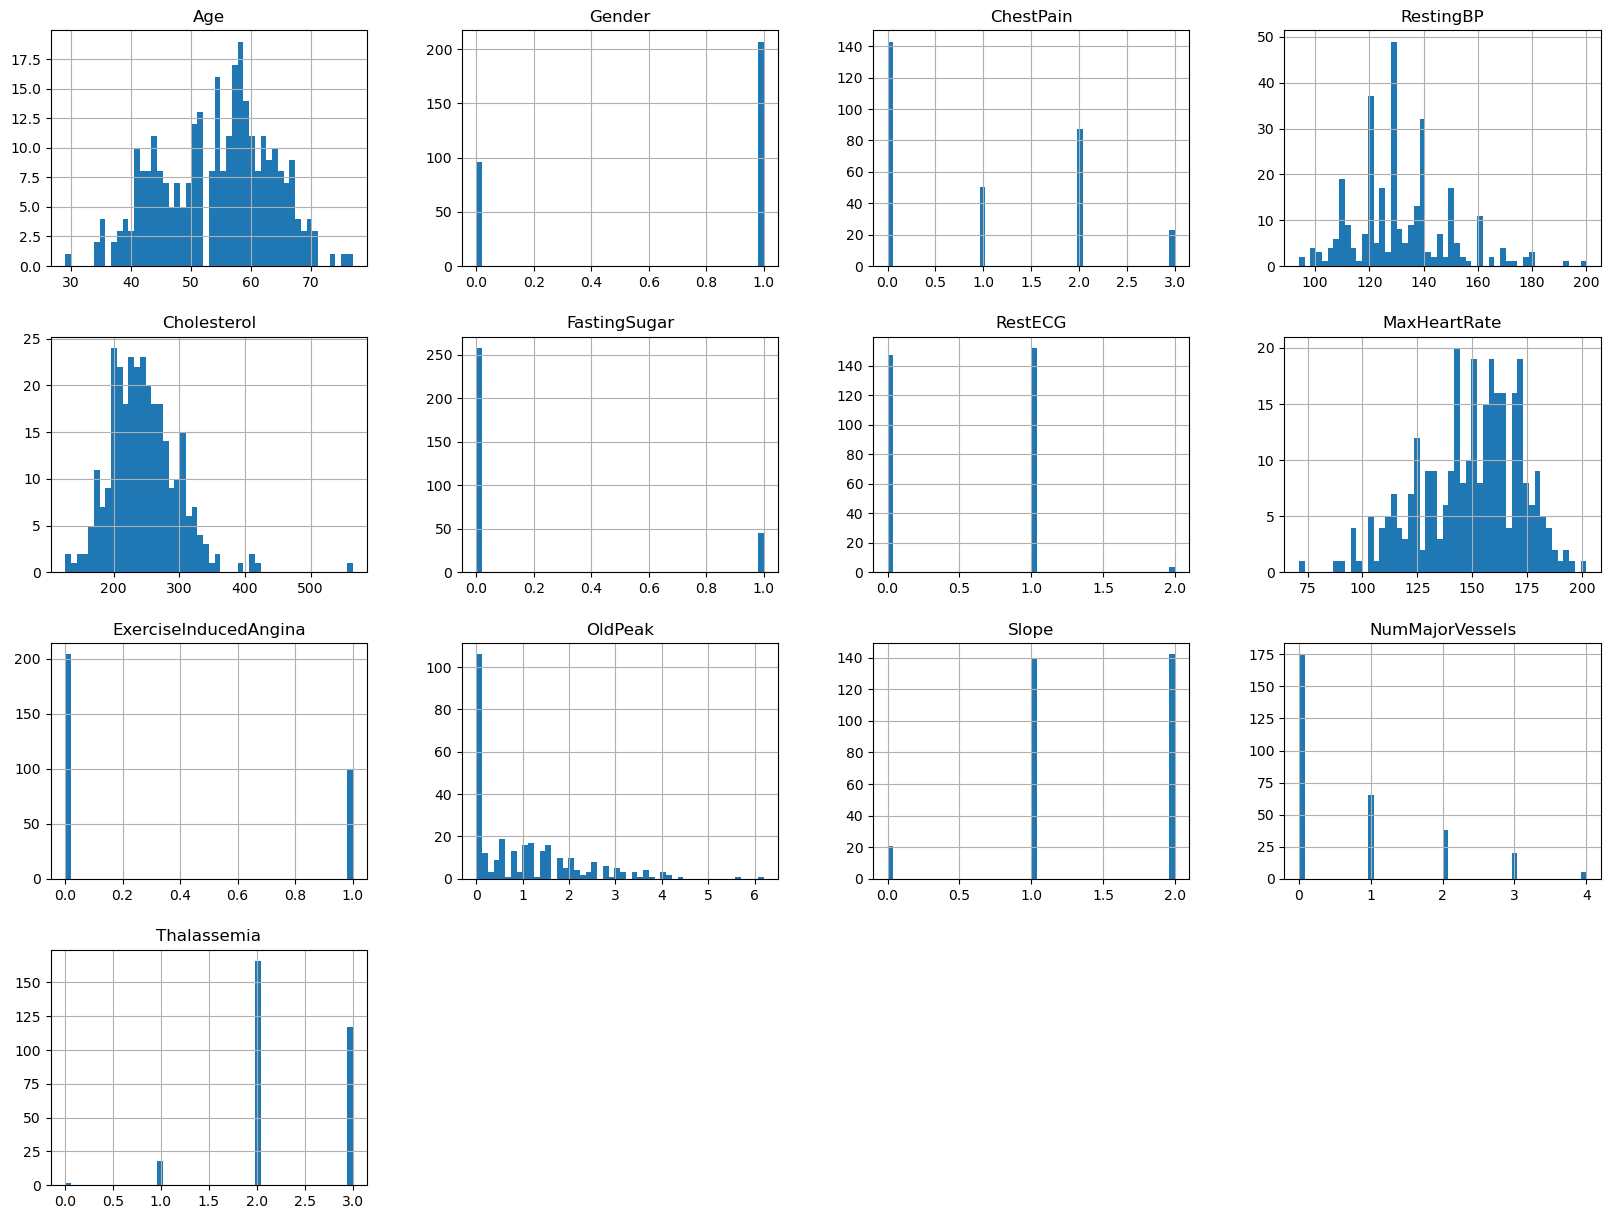

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

We have quite a lot of different variables in the data. Some of them can be considered as gradient as they are numerical, such as age, chol, talach and restbps. We also have some discrete values which are limited selection such as ca, cp, thal, etc. Then we have the last cateogry as binary which is either 0 or 1. These variables are like sex, sick, exang and fbs.

### Cofirm wheather it is  balanced dataset.

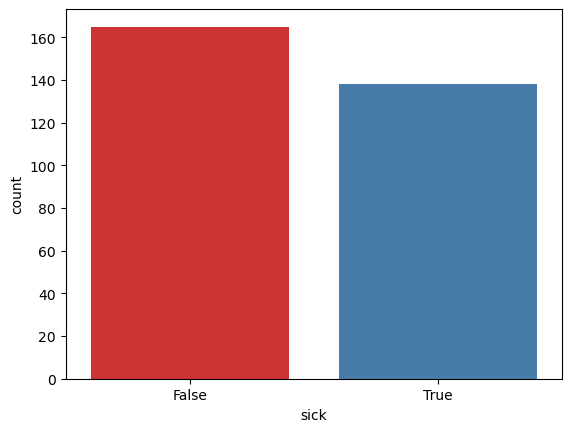

False    165
True     138
Name: sick, dtype: int64

In [10]:
import seaborn as sns

sns.countplot(x="sick", data=df, palette="Set1")
plt.show()
df['sick'].value_counts()

# Dataset is balanced

# EDA

In [11]:
corr_matrix = df.corr()
corr_matrix["sick"].sort_values(ascending=False)

sick                     1.000000
ExerciseInducedAngina    0.436757
OldPeak                  0.430696
NumMajorVessels          0.391724
Thalassemia              0.344029
Gender                   0.280937
Age                      0.225439
RestingBP                0.144931
Cholesterol              0.085239
FastingSugar             0.028046
RestECG                 -0.137230
Slope                   -0.345877
MaxHeartRate            -0.421741
ChestPain               -0.433798
Name: sick, dtype: float64

/tmp/ipykernel_36590/3106727703.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


<AxesSubplot:>

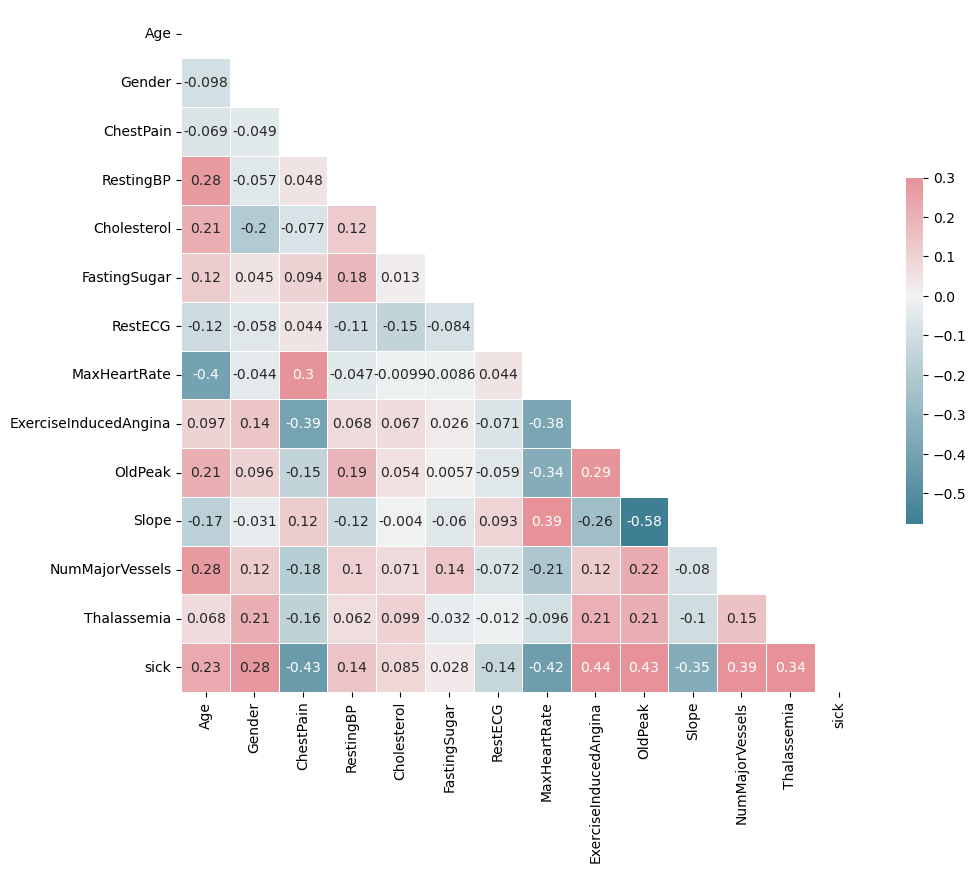

In [12]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Data PreProcessing

In [13]:
sick_arr = df['sick']
df = df.drop(['sick'], axis=1)

In [14]:
from sklearn.preprocessing import OneHotEncoder
categoricalFeatures = ['Gender','ChestPain','FastingSugar','RestECG','ExerciseInducedAngina','Slope','Thalassemia']

df_encoded = pd.get_dummies(df, columns=categoricalFeatures)



from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

numericalFeatures = ['age','trestbps','chol','thalach','oldpeak','ca']
categoricalFeatures = ['sex','cp','fbs','restecg','exang','slope','thal']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), numericalFeatures),
        ("cat", OneHotEncoder(categories='auto'), categoricalFeatures)
])

prepro = full_pipeline.fit(df)
df_prepared = full_pipeline.fit_transform(df)


df_prepared.shape

In [15]:
X_train_simple, X_test_simple, y_train, y_test = train_test_split(df_encoded, sick_arr, test_size=0.3, random_state=42)
print(X_train_simple.shape)
print(y_test.shape)

(212, 26)
(91,)


In [16]:
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train_simple)

# Transform the test data using the already fitted scaler
X_test = scaler.transform(X_test_simple)

# Save the scaler using pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)



NumMajorVessels: 0.1254136820149846
MaxHeartRate: 0.0920239536716667
OldPeak: 0.08018441989878262
ChestPain_0: 0.0776133265485875
Age: 0.07536298287540638
RestingBP: 0.06594152616194042
Thalassemia_3: 0.06242391802472485
Cholesterol: 0.0604926398754586
Thalassemia_2: 0.05903288077454066
ExerciseInducedAngina_1: 0.05085042950376869
ExerciseInducedAngina_0: 0.04976089931335693
Slope_2: 0.03348844748980054
ChestPain_2: 0.02862626025321993
Slope_1: 0.026548285110276033
Gender_1: 0.0187791935167028
Gender_0: 0.017759079966493094
RestECG_0: 0.012560697217144576
ChestPain_3: 0.011308764924687947
RestECG_1: 0.01130252305011209
FastingSugar_0: 0.010676047826411857
ChestPain_1: 0.009961364764874263
FastingSugar_1: 0.008133964643908
Thalassemia_1: 0.0056813323370194626
Slope_0: 0.0053791636761404684
RestECG_2: 0.00036351545940389824
Thalassemia_0: 0.0003307011005869496


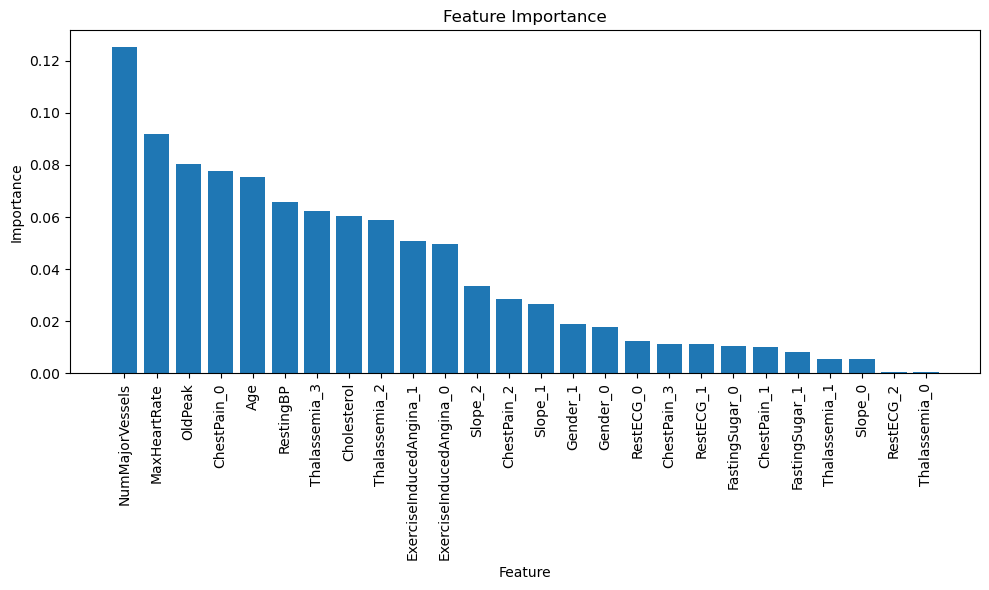

In [17]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier


# Create a RandomForestClassifier (you can use your own model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = df_encoded.columns

# Create a sorted list of feature names and their importance scores
sorted_feature_importances = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")
# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_feature_importances], [x[1] for x in sorted_feature_importances])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

accuracy = true pos + true neg / total

precision = true pos / true pos + fals pos

recall = true pos / true pos + fals neg

### Implementing SVM

In [18]:
svm = SVC(random_state = 42, probability = True, gamma='scale')
svm.fit(X_train, y_train)


print(svm)

y_pred = svm.predict(X_test)

SVC(probability=True, random_state=42)


### Report the accuracy, precision, recall, F1 Score, confusion matrix

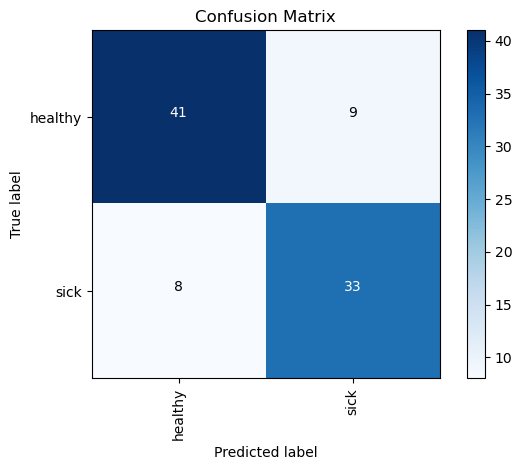

None
              precision    recall  f1-score   support

       False       0.84      0.82      0.83        50
        True       0.79      0.80      0.80        41

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Accuracy:   0.8131868131868132
Precision:  0.7857142857142857
Recall:     0.8131868131868132
F1:         0.7951807228915663


In [19]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score
print(draw_confusion_matrix(y_test, y_pred, ["healthy", "sick"]))
print(classification_report(y_test, y_pred))
print("Accuracy:  ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:    ", accuracy_score(y_test, y_pred))
print("F1:        ", f1_score(y_test, y_pred))

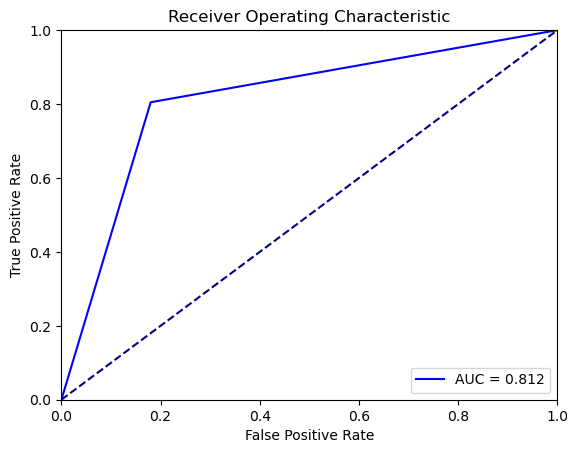

AUC: 0.812439024390244


In [20]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC:", metrics.roc_auc_score(y_test, y_pred))

### Clustering Approaches 

### K-Nearest Neighbor  

In [21]:
# Initialize KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can set the desired number of neighbors

# Fit the model
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Print predictions
print(y_pred_knn)

[ True  True False  True False False  True  True  True False False  True
 False  True False False False  True  True  True  True  True False False
 False False False  True  True False  True  True  True  True False  True
 False False  True  True False False False False False  True  True False
  True  True  True  True False False  True  True  True False  True  True
  True False  True False False  True False False False False False False
  True  True  True False False False  True  True False  True False False
  True False  True False False  True False]


/home/chary/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


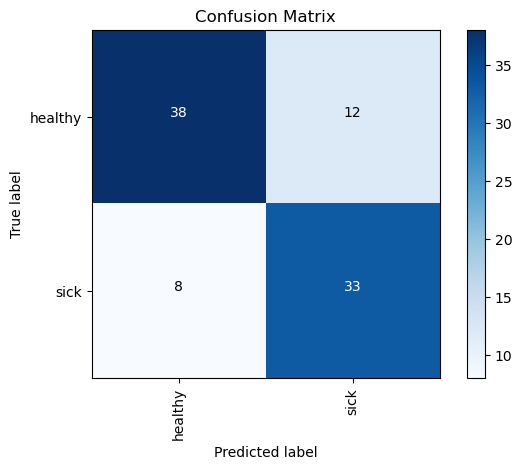

None
              precision    recall  f1-score   support

       False       0.83      0.76      0.79        50
        True       0.73      0.80      0.77        41

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

Accuracy:   0.7802197802197802


In [22]:
print(draw_confusion_matrix(y_test, y_pred_knn, ["healthy", "sick"]))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:  ", accuracy_score(y_test, y_pred_knn))

In [23]:
print("Homogenity Score:            ", metrics.homogeneity_score(y_test, y_pred))
print("Completeness Score:          ", metrics.completeness_score(y_test, y_pred))
print("V-measure:                   ", metrics.v_measure_score(y_test, y_pred))
print("Adjusted Rand Score:         ", metrics.adjusted_rand_score(y_test, y_pred))
print("Adjusted Mutual Information: ", metrics.adjusted_mutual_info_score(y_test, y_pred))

Homogenity Score:             0.3033827912237179
Completeness Score:           0.30253125624196703
V-measure:                    0.3029564253708898
Adjusted Rand Score:          0.38558833842608825
Adjusted Mutual Information:  0.2972577737991048


### Parameter Optimization. 

In [25]:
k_neighbors = [1, 2, 3, 5, 10, 20, 50, 100]
for kn in k_neighbors:
 neighbours = KNeighborsClassifier(n_neighbors=kn)
 neighbours.fit(X_train, y_train)
 y_pred = neighbours.predict(X_test)
 print("For k_neighbors =", kn)
 print("Accuracy:                    ", metrics.accuracy_score(y_test, y_pred))
 print("Homogenity Score:            ", metrics.homogeneity_score(y_test, y_pred))
 print("Completeness Score:          ", metrics.completeness_score(y_test, y_pred))
 print("V-measure:                   ", metrics.v_measure_score(y_test, y_pred))
 print("Adjusted Rand Score:         ", metrics.adjusted_rand_score(y_test, y_pred))
 print("Adjusted Mutual Information: ", metrics.adjusted_mutual_info_score(y_test, y_pred))
 print("\n")

For k_neighbors = 1
Accuracy:                     0.7582417582417582
Homogenity Score:             0.20130675251163743
Completeness Score:           0.2003205074400461
V-measure:                    0.2008124190528813
Adjusted Rand Score:          0.25860076355816675
Adjusted Mutual Information:  0.19428607752322744


For k_neighbors = 2
Accuracy:                     0.7582417582417582
Homogenity Score:             0.2012522132905726
Completeness Score:           0.2159276781229739
V-measure:                    0.20833182052806762
Adjusted Rand Score:          0.2586909468185965
Adjusted Mutual Information:  0.2016031216261527


For k_neighbors = 3
Accuracy:                     0.7362637362637363
Homogenity Score:             0.17412945767488766
Completeness Score:           0.17303450271040147
V-measure:                    0.17358025344892825
Adjusted Rand Score:          0.21464241371784062
Adjusted Mutual Information:  0.1668366041679437


For k_neighbors = 5
Accuracy:               

/home/chary/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/chary/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

The most optimal result comes from k_neighbor = 50.

In [27]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)  # n_neighbors means k
knn.fit(X_train, y_train)
print(knn)

y_pred_knn = knn.predict(X_test)

KNeighborsClassifier(n_neighbors=50)


/home/chary/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


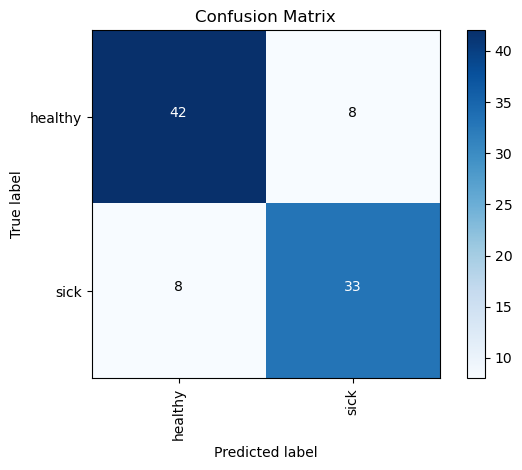

None
              precision    recall  f1-score   support

       False       0.84      0.84      0.84        50
        True       0.80      0.80      0.80        41

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Accuracy:   0.8241758241758241


In [28]:
print(draw_confusion_matrix(y_test, y_pred_knn, ["healthy", "sick"]))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:  ", accuracy_score(y_test, y_pred_knn))

In [29]:
!pip install joblib

In [30]:
# Serialize the preprocessing pipeline using pickle
with open("knn_HD.pkl", "wb") as f:
    pickle.dump(knn, f)



In [31]:
col = df_encoded.columns
row_index = 1
selected_row = df_encoded.loc[row_index]
display(selected_row)

Age                         37.0
RestingBP                  130.0
Cholesterol                250.0
MaxHeartRate               187.0
OldPeak                      3.5
NumMajorVessels              0.0
Gender_0                     0.0
Gender_1                     1.0
ChestPain_0                  0.0
ChestPain_1                  0.0
ChestPain_2                  1.0
ChestPain_3                  0.0
FastingSugar_0               1.0
FastingSugar_1               0.0
RestECG_0                    0.0
RestECG_1                    1.0
RestECG_2                    0.0
ExerciseInducedAngina_0      1.0
ExerciseInducedAngina_1      0.0
Slope_0                      1.0
Slope_1                      0.0
Slope_2                      0.0
Thalassemia_0                0.0
Thalassemia_1                0.0
Thalassemia_2                1.0
Thalassemia_3                0.0
Name: 1, dtype: float64